# Assignment 3.1
Name: Steve Amancha  
Date: May 23 2023

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit the assignment as a PDF file. Always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 3.2.

In an exit poll of 1648 voters in the 2020 Senatorial election in Arizona, 51.5% said they voted
for Mark Kelly and 48.5% said they voted for Martha McSally

a) Suppose that actually 50% of the population voted for Kelly. If this exit poll had the
properties of a simple random sample, find the standard error of the sample proportion
voting for him.

b) Under the 50% presumption, are the results of the exit poll surprising? Why? Would you
be willing to predict the election outcome? Explain by (i) conducting a simulation; (ii)
using the value found in (a) for the standard error.

`(a)`  
Standard Error of sample proportion for Kelly : 0.01

In [150]:
import random
import scipy.stats as stats
import pandas as pd
import numpy as np
from itertools import permutations
import seaborn as sns
import matplotlib.pyplot as plt

# givens 
sample_size = 1648 
kelly_vote = .515
sample_mean = .5

# Using formula from sample_mean 3.2.4 for standard error
# Parameters: sample_mean, sample_size
def find_standard_error(sample_mean, sample_size):
    standard_error = np.sqrt((sample_mean * (1 - sample_mean)) / sample_size)
    return standard_error

std_error = round(find_standard_error(sample_mean, sample_size), 3)
print("The standard error: ", std_error)

The standard error:  0.012


(b)  

i) From the simulation, no the results are not suprising because the vote amount falls within the range of the confidence interval.

ii) Using the value from part a) the stanard error of 0.012, I am not suprised from the election results because Kelly's vote falls within the confidence range. I would not want to predict the election because the standard error is larger than in part A and the election is close. 

In [155]:
three_deviations = 3 * std_error 
lower = sample_mean - three_deviations
upper = sample_mean + three_deviations

print("From a) std_error using formula: ", std_error)
print("lower bound for 3 std_err: ", round(lower, 3))
print("upper bound for 3 std_err: ", round(upper, 3))
print()

# Finding sample proportions and their simulated mean, std_dev, and std_err
sim_sample = np.random.binomial(sample_size, sample_mean, size=10000) 
sim_sample_proportions = sim_sample / sample_size
sim_mean = np.mean(sim_sample_proportions)
sim_std_dev = round(np.std(sim_sample_proportions) , 2) 
sim_std_err = round(simulated_std_dev / np.sqrt(10000), 2)

confidence_interval = (sim_mean - (3 * sim_std_dev) , sim_mean + (3 * sim_std_dev) ) 
print("observed kelly vote: ", kelly_vote)
print("Simulated std_dev: " , sim_std_dev)
print("Simulated std_mean: " , sim_mean)
print("Simulated std_error: " , sim_std_err)
print("Simulated Confidence Interval:", confidence_interval)

From a) std_error using formula:  0.012
lower bound for 3 std_err:  0.464
upper bound for 3 std_err:  0.536

observed kelly vote:  0.515
Simulated std_dev:  0.01
Simulated std_mean:  0.5000581917475728
Simulated std_error:  0.2
Simulated Confidence Interval: (0.4700581917475728, 0.5300581917475728)


## Problem 3.3.

 The 49 students in a class at the University of Florida made blinded evaluations of pairs of
cola drinks. For the 49 comparisons of Coke and Pepsi, Coke was preferred 29 times. In the
population that this sample represents, is this strong evidence that a majority prefers Coke?
Use a simulation of a sampling distribution to answer.

Yes, this sample represents strong evidence because after 10000 simulations there is a right side bias of preference with which with the class sample. 

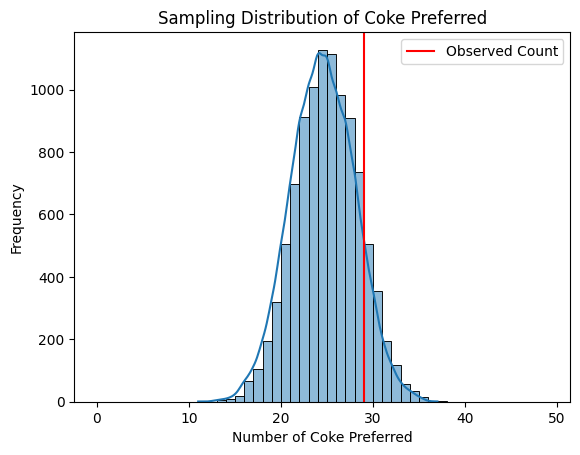

In [3]:
# given variables
n_students = 49
coke_preferred = 29

# Number of simulations
num_simulations = 10000

# Simulate the sampling distribution
sampling_distribution = np.random.binomial(n_students, 0.5, size=num_simulations)

# Creating DataFrame to store the sampling distribution
df_sampling = pd.DataFrame({'Coke Preferred': sampling_distribution})

# Plotting sampling distribution
sns.histplot(data=df_sampling, x='Coke Preferred', bins=range(n_students + 1), kde=True)

# Vertical line for preferred coke amount
plt.axvline(x=coke_preferred, color='r', linestyle='-', label='Observed Count')

# Set plot title and labels
plt.title('Sampling Distribution of Coke Preferred')
plt.xlabel('Number of Coke Preferred')
plt.ylabel('Frequency')

# Display the plot
plt.legend()
plt.show()



## Problem 3.5.

The example in Section 3.1.4 simulated sampling distributions of the sample mean to determine how precise $\bar{Y}$ for $n=25$ may estimate a population mean $\mu.$

a) Find the theoretical standard error of $\bar{Y}$ for the scenario values of $\sigma = 5$ and 8. How do they compare to the standard deviations of the 100,000 sample means in the simulations?

In comparison, the standard deviations of the 100,000 sample means is almost identical to the standard deviations of the smaller samples from 3.1.4.  

Using shape and scale from given means and standard deviations   
Standard Deviation of 100000 sample means with mean of 5: 4.98   
Standard Deviation of 100000 sample means with mean of 8: 8.0   

Theoretical Standard Error with mean of 5: 1.0   
Theoretical Standard Error with mean of 8: 1.6   

In [64]:
# given standard deviation scenarios from section 3.1.4
n = 25
sim_size = 100000
mean1, std1 = (20, 5)
mean2, std2 = (24, 8)

# calculating values for shape and sclae of both scenarios
scale = (std1** 2) / mean1
shape = (mean1 / std1)** 2
scale2 = round((std2 ** 2) / mean2, 2)
shape2 = (mean2 / std2)** 2

# Generate 100,000 sample means from a gamma distribution scenario 1
sample_means1 = np.random.gamma(shape, scale, size=sim_size)
std_dev1 = round(np.std(sample_means1), 2)

# Generate 100,000 sample means from a gamma distribution scenario 2
sample_means2 = np.random.gamma(shape2, scale2, size=sim_size)
std_dev2 = round(np.std(sample_means2), 2)

# Calculating theoretical standard errors
theo_std_err = round(std1 / np.sqrt(n), 2)
theo_std_err2 = round(std2 / np.sqrt(n), 2)

print("Using shape and scale from given means and standard deviations")
print("Standard Deviation of 100000 sample means with mean of 5:", std_dev1)
print("Standard Deviation of 100000 sample means with mean of 8:", std_dev2)
print()
print("Theoretical Standard Error with mean of 5:", theo_std_err)
print("Theoretical Standard Error with mean of 8:", theo_std_err2)

Using shape and scale from given means and standard deviations
Standard Deviation of 100000 sample means with mean of 5: 4.98
Standard Deviation of 100000 sample means with mean of 8: 8.0

Theoretical Standard Error with mean of 5: 1.0
Theoretical Standard Error with mean of 8: 1.6


b) In the first scenario, we chose $\sigma = 5$ under the belief that if $\mu = 20$, about 2/3 of the sample values would fall between `$`15 and `$`25. For the gamma distribution with $(\mu, \sigma) = (20,5),$ show that the actual probability between 15 and 25 is 0.688.

In [5]:
# Calculating the cumulative probability at the lower and upper bounds using parameters from scenario 1
lower_bound = 15
upper_bound = 25

cdf_lower = stats.gamma.cdf(lower_bound, a=shape, scale=scale)
cdf_upper = stats.gamma.cdf(upper_bound, a=shape, scale=scale)

# Calculating the actual probability between the bounds
actual_probability = round(cdf_upper - cdf_lower, 3)

print("Actual Probability between 15 and 25:", actual_probability)


Actual Probability between 15 and 25: 0.688


## Problem 3.8.

Construct the sampling distribution of the sample proportion of heads, for flipping a balanced
coin (a) once; (b) twice; (c) three times; (d) four times. Describe how the shape changes
as the number of flips $n$ increases. What would happen if $n$ kept growing? Why?


As n increases the shape starts to smooth out and become more bell shaped.  
If n keeps on growing, we can see that the distribution approaches normal as sample size gets larger. In theory the distribution is perfectly normal only when the sample size tends to infinity.

,n=1,n=2,n=3,n=4
0,1.0,0.5,1.000000,0.50
1,1.0,0.0,0.666667,0.25
2,1.0,0.5,0.333333,0.50
3,1.0,0.5,0.666667,0.00
4,0.0,0.5,0.666667,0.75


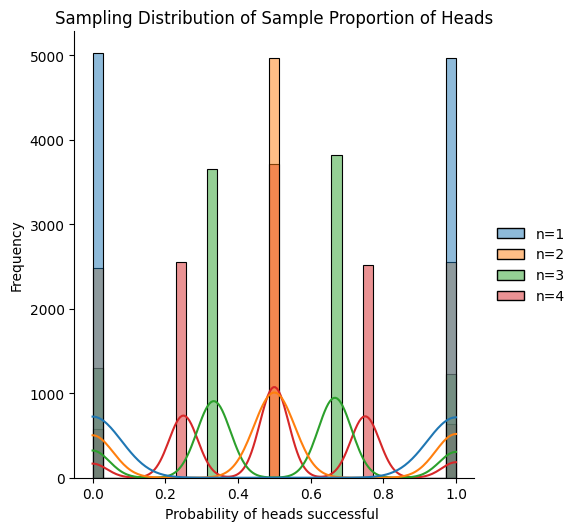

In [6]:
def display_sample_proportions(sample_proportion, sample_sizes):
    # Simulate coin flips and calculate sample proportions for each sample size
    sampling_distributions = {}
    for n in sample_sizes:
        proportions = np.random.binomial(n, sample_proportion, size=10000) / n
        sampling_distributions[f'n={n}'] = proportions

    # Create a DataFrame from the sampling distributions
    df = pd.DataFrame(sampling_distributions)
    display(df.head())
    return df

# Givens from problem 
proportion = .5
samples = [1,2,3,4]

# calculating data frame from sample proportions
df = display_sample_proportions(proportion , samples)
sns.displot(data=df, kde=True)

# Set plot title and labels
plt.title('Sampling Distribution of Sample Proportion of Heads')
plt.xlabel('Probability of heads successful ')
plt.ylabel('Frequency')
plt.show()


## Problem 3.11.

Simulate taking a random sample of sinze $n$ from a Poisson distribution with $\mu = 5.$ Find $\bar{y}$ for $n=10, n = 1000, n = 100,000,$ and $n=10,000,000$ to illustrate the law of large numbers.

In [46]:
sample_mean = 5
samples = [10, 1000, 10000, 50000]

for n in samples:
    # Generate the sample
    sample = np.random.poisson(sample_mean, n)
    # Calculate the sample mean
    sample_mean = round(np.mean(sample), 2)
    print(f"Sample Size: {n}\t Sample Mean: {sample_mean}")

Sample Size: 10	 Sample Mean: 5.1
Sample Size: 1000	 Sample Mean: 5.05
Sample Size: 10000	 Sample Mean: 5.06
Sample Size: 50000	 Sample Mean: 5.08


## Problem 3.12.

Simulate random sampling from a normal population distribution with several $n$ values to
illustrate the law of large numbers.

In [8]:
mean = 7
std_dev = 0.5
samples = [10, 500, 1000, 10000]

for n in samples:
    # Generate the sample
    sample = np.random.normal(mean, std_dev, n)
    # Calculate the sample mean
    sample_mean = round(np.mean(sample),4)
    
    print(f"Sample Size: {n}\tSample Mean: {sample_mean}")

Sample Size: 10	Sample Mean: 7.1439
Sample Size: 500	Sample Mean: 7.0242
Sample Size: 1000	Sample Mean: 6.9843
Sample Size: 10000	Sample Mean: 6.9871


## Problem 3.13.

Simulate random sampling from a uniform population distribution with several $n$ values to
illustrate the Central Limit Theorem.

In [43]:
samples = [10, 500, 1000, 10000]

# Creating random samples at different sample sizes
for n in samples:
    uni_sample = np.random.uniform(size= n, low=0, high=1)
    
    #Calculating mean of the sample
    sample_mean = round(np.mean(uni_sample), 2)
    print(f"Sample Size: {n}\tSample Mean: {sample_mean}")


Sample Size: 10	Sample Mean: 0.44
Sample Size: 500	Sample Mean: 0.51
Sample Size: 1000	Sample Mean: 0.49
Sample Size: 10000	Sample Mean: 0.5


## Problem 3.14.

On each bet in a sequence of bets, you win 1 dollar with probability 0.50 and lose 1 dollar (i.e., win negative 1 dollar) with probability 0.50. Let $Y$ denote the total of your winnings and losings after 100 bets. Giving your reasoning, state the approximate distribution of $Y.$ 

Binomial distribution because of even likelihood at 0.5 probability.   
Approximate total winnings $8.

In [10]:
# Parameters given
prob = 0.5
total_sum = 0
bets = 100

# Simulate the total winnings and losings after 100 bets
winnings = np.random.binomial(bets, prob)

# calculate how much I loss, in order to calculate my total winning sum
losses = bets - winnings
total_sum = winnings - losses 
print(f"Sum of winnings: ${total_sum}")

Sum of winnings: $-4


## Problem 3.15.

According to a General Social Survey, in the United States the population distribution of $Y$ =
number of good friends (not including family members) has a mean of about 5.5 and a standard
deviation of about 3.9.

a) Is it plausible that this population distribution is normal? Explain.

Not plausible because you wouldn't have negative good friends which will depict a more right skewed distribution

b) If a new survey takes a simple random sample of 1000 people, describe the sampling
distribution of $\bar{Y}$ by giving its shape and approximate mean and standard error.

Useing the central limit theory, you could infer that the sample mean was approximately 5.5 from the larger population. The distribution is expected to be approximately normal, centered around the population mean, with a standard error that decreases as the sample size increases.

sample standard error:  0.12  
sample shape:  1.99   
sample mean:  5.31  

In [34]:
# parameters given
pop_mean = 5.5
pop_std_dev = 3.9
pop_size = 10000
sample_size = 1000

# Generate random samples from the population distribution
samples = np.random.normal(pop_mean, pop_std_dev, size=(sample_size, pop_size))

# For smaller sample size of 1000, finding means, std_dev, standard error, and shape
sample_means = round(np.mean(samples), 2) 
sample_std_dev = round(np.std(samples), 2)
sample_shape = round((sample_means / sample_std_dev)** 2, 2)
sample_std_err = round(sample_std_dev / np.sqrt(sample_size), 2)

print(f"sample standard error: ", sample_std_err)
print(f"sample shape: ", sample_shape)
print(f"sample mean: ", sample_means)

sample standard error:  0.12
sample shape:  1.99
sample mean:  5.5


c) Suppose that actually the mean of 5.5 and standard deviation of 3.9 are not population
values but are based on a sample of 1000 people. Treating results as a simple random
sample, give an interval of values within which you can be very sure that the population
mean falls. Explain your reasoning.

Almost certainly population mean is within 3 standard errors of sample mean.
Due to the bell shapeness of a normal distribution, the population will very likely fall between +/- 3 standard deviations from the sample mean.  

Range of ages: [5.14,  5.86]


In [12]:
lower_bound = sample_means - (3 * sample_std_err)
upper_bound = sample_means + (3 * sample_std_err)
print(lower_bound, upper_bound)

5.14 5.86


## Problem 3.18.

Sunshine City, which attracts primarily retired people, has 90,000 residents with a mean age
of 72 years and a standard deviation of 12 years. The age distribution is skewed to the left. A
random sample of 100 residents of Sunshine City has $\bar{y} = 70$ and $s = 11.$

a)  Describe the center and spread of the (i) population distribution, (ii) sample data distribution. What shape does the sample data distribution probably have? Why?

The center of the population distribution will be at the mean age and with a spread of 12. 

The sample data distrubtion will have a similar center point at 70 and with a spread of 11

The sample data distribution is likely to have a bell-shaped curve resembling a normal distribution due to the central limit  theorum. The sample mean tends to follow a normal distribution regardless of the shape of the population distribution.

In [21]:
pop_size = 90000
pop_mean = 72
pop_std_dev = 12
pop_age_range = {"low bound ": pop_mean - ( pop_std_dev * 3), "high bound: ": pop_mean + ( pop_std_dev * 3)}
sample_size = 100
sample_mean = 70
sample_std_dev = 11

b) Find the center and spread of the sampling distribution of $\bar{Y}$ for $n = 100.$ What shape does it have and what does it describe?


It also will have a bell shaped distribution and describes a normal distribution. 

In [30]:
sampling_size = 100
samples = np.random.normal(sample_mean, sample_std_dev, size=(sampling_size, sample_size))
sampling_mean = round(np.mean(samples),2)
sampling_std_dev = round(np.std(samples),2)

print("Sampling mean / center: ", sampling_mean)
print("Sampling spread: ", sampling_std_dev)

Sampling mean / center:  70.04
Sampling spread:  10.9


c)  Explain why it would not be unusual to sample a person of age 60 in Sunshine City, but
it would be highly unusual for the sample mean to be 60, for a random sample of 100
residents.

It would not be unusual to sample of person age 60 because they fall within 3 standard deviations.   

It would be highly unusual for a sample mean of 100 to be 60 years of age because the mean of the population is 72, and all the sample means should fall very close to that value.

In [17]:
print(pop_age_range)

{'low bound ': 36, 'high bound: ': 108}


d) Describe the sampling distribution of $\bar{Y}$ : (i) for a random sample of size $n = 1$; (ii) if you sample all 90,000 residents.

i) The center of the sampling distribution would be the value of the sample mean itself, which is the same as the value of the single observation. The spread or variability of the sampling distribution would be zero since there is no variation in the sample means. The sample mean cannot provide a reliable estimate of the population mean because it is based on a single observation. 

ii) If you sampled all 90,000 residents you would get a smoother distribution that looks like a bell curve. The center of this distribution will more accurately represent the mean and center of all the residents. 

## Problem 3.21.

In your school, suppose that GPA has an approximate normal distribution with $\mu = 3.0, \sigma = 0.40.$ Not knowing $\mu$, you randomly sample $n = 25$ students to estimate it. Using simulation for this application, illustrate the difference between a sample data distribution and the sampling distribution of Y .

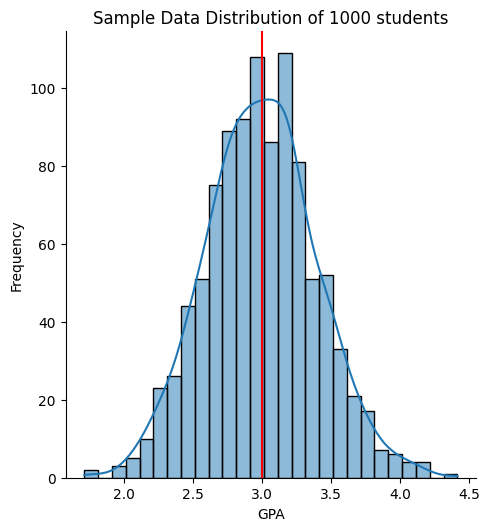

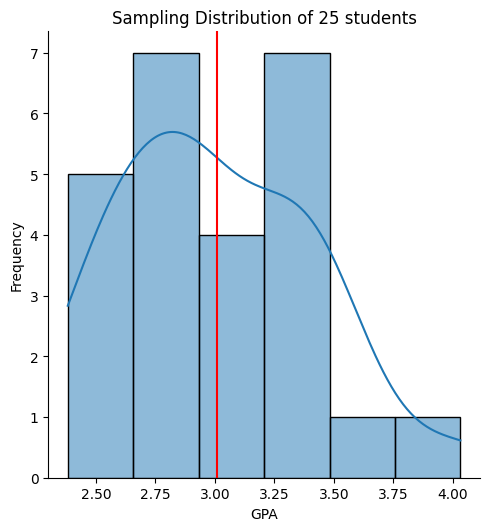

In [19]:
# Parameters given 
pop_mean = 3
pop_std_dev = .4
pop_size = 1000
sample_size = 25

# Creating distributions and finding sample mean
population = np.random.normal(pop_mean, pop_std_dev, size=pop_size)
sample = np.random.normal(pop_mean, pop_std_dev, size=sample_size)
sample_mean = round(np.mean(sample), 2)

# Add a title and labels to the plots
sns.displot(population, kde=True)
plt.title('Sample Data Distribution of 1000 students')
plt.xlabel('GPA')
plt.ylabel('Frequency')
# Vertical line for pop mean
plt.axvline(x=pop_mean, color='r', linestyle='-', label='Population mean')

sns.displot(sample, kde=True)
plt.title('Sampling Distribution of 25 students')
plt.xlabel('GPA')
plt.ylabel('Frequency')
# Vertical line for sample mean
plt.axvline(x=sample_mean, color='r', linestyle='-', label='Population mean')

## Problem 3.26.

When sample data were used to rank states by brain cancer rates, Ellenberg (2014) noted
that the highest ranking state (South Dakota) and the nearly lowest ranking state (North
Dakota) had relatively small sample sizes. Also, when schools in North Carolina were ranked
by their average improvement in test scores, the best and the worst schools were very small
schools. Explain how these results could merely reflect how the variability of sample means and
proportions depends on the sample size.

Variability decreases with larger sample sizes. As sample sizes increase, estimates of means and proportions become more stable and reliable. 

Since the sample size for brain cancer rates and tests scores were both small the results could be misleading because of extreme values in small sample sizes. 